# Classification of Forest Type from Aerial Sensors Data

| Contribution   |
| :---   |
| Leonardo Villamil  |
| Litian Chen        |

In [1]:
# numpy handles pretty much anything that is a number/vector/matrix/array
import numpy as np

# pandas handles dataframes (exactly the same as tables in Matlab)
import pandas as pd

# matplotlib emulates Matlabs plotting functionality
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import PredefinedSplit
from sklearn.multiclass import OneVsRestClassifier
from sklearn import tree

# Funtion for splitting the data
from sklearn.model_selection import train_test_split

from termcolor import colored

In [2]:
train = pd.read_csv('./Data/Q2/training.csv')
print('Training dataset size:' + str(train.shape))
train.head()

Training dataset size:(198, 28)


,class,b1,b2,b3,b4,b5,b6,b7,b8,b9,...,pred_minus_obs_H_b9,pred_minus_obs_S_b1,pred_minus_obs_S_b2,pred_minus_obs_S_b3,pred_minus_obs_S_b4,pred_minus_obs_S_b5,pred_minus_obs_S_b6,pred_minus_obs_S_b7,pred_minus_obs_S_b8,pred_minus_obs_S_b9
0,d,39,36,57,91,59,101,93,27,60,...,-2.36,-18.41,-1.88,-6.43,-21.03,-1.60,-6.18,-22.50,-5.20,-7.86
1,h,84,30,57,112,51,98,92,26,62,...,-2.26,-16.27,-1.95,-6.25,-18.79,-1.99,-6.18,-23.41,-8.87,-10.83
2,s,53,25,49,99,51,93,84,26,58,...,-1.46,-15.92,-1.79,-4.64,-17.73,-0.48,-4.69,-19.97,-4.10,-7.07
3,s,59,26,49,103,47,92,82,25,56,...,2.68,-13.77,-2.53,-6.34,-22.03,-2.34,-6.60,-27.10,-7.99,-10.81
4,d,57,49,66,103,64,106,114,28,59,...,-2.94,-21.74,-1.64,-4.62,-23.74,-0.85,-5.50,-22.83,-2.74,-5.84


In [3]:
test = pd.read_csv('./Data/Q2/testing.csv')
print('Testing dataset size:' + str(test.shape))
test.head()

Testing dataset size:(325, 28)


,class,b1,b2,b3,b4,b5,b6,b7,b8,b9,...,pred_minus_obs_H_b9,pred_minus_obs_S_b1,pred_minus_obs_S_b2,pred_minus_obs_S_b3,pred_minus_obs_S_b4,pred_minus_obs_S_b5,pred_minus_obs_S_b6,pred_minus_obs_S_b7,pred_minus_obs_S_b8,pred_minus_obs_S_b9
0,d,67,51,68,115,69,111,136,31,67,...,-9.17,-18.27,-1.80,-6.32,-20.88,-1.63,-6.13,-22.56,-5.53,-8.11
1,s,67,28,51,99,50,97,82,26,59,...,-2.25,-20.13,-2.11,-6.35,-21.94,-1.22,-6.13,-22.20,-3.41,-6.57
2,s,63,26,50,95,49,91,81,26,57,...,-0.44,-17.64,-1.81,-4.70,-19.39,-0.65,-5.01,-20.89,-3.96,-6.85
3,d,63,42,63,97,66,108,111,28,59,...,-2.34,-20.20,-1.89,-5.47,-21.65,-0.99,-5.71,-22.19,-3.41,-6.52
4,s,46,27,50,83,51,90,76,26,56,...,1.25,-18.62,-2.17,-7.11,-21.12,-1.56,-6.35,-22.19,-4.45,-7.32


## Data handle and sanitizing

In [4]:
# Check for missing Values
print('\nSum of NaN values per column in Training data set:')
print(np.sum(train.isna()).to_string())
print('\nSum of NaN values per column in Testing data set:')
print(np.sum(test.isna()).to_string())


Sum of NaN values per column in Training data set:
class                  0
b1                     0
b2                     0
b3                     0
b4                     0
b5                     0
b6                     0
b7                     0
b8                     0
b9                     0
pred_minus_obs_H_b1    0
pred_minus_obs_H_b2    0
pred_minus_obs_H_b3    0
pred_minus_obs_H_b4    0
pred_minus_obs_H_b5    0
pred_minus_obs_H_b6    0
pred_minus_obs_H_b7    0
pred_minus_obs_H_b8    0
pred_minus_obs_H_b9    0
pred_minus_obs_S_b1    0
pred_minus_obs_S_b2    0
pred_minus_obs_S_b3    0
pred_minus_obs_S_b4    0
pred_minus_obs_S_b5    0
pred_minus_obs_S_b6    0
pred_minus_obs_S_b7    0
pred_minus_obs_S_b8    0
pred_minus_obs_S_b9    0

Sum of NaN values per column in Testing data set:
class                  0
b1                     0
b2                     0
b3                     0
b4                     0
b5                     0
b6                     0
b7                    

## Data Splitting

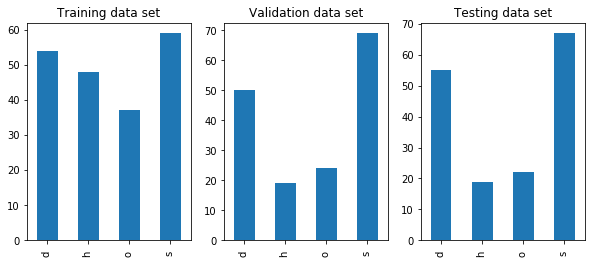

In [5]:
# Separate X and y variables
y_train = pd.Categorical(train["class"])
X_train = train.drop("class", axis=1)

y_test = pd.Categorical(test["class"])
X_test = test.drop("class", axis=1)

# Split testing data in 50% testing & 50% validation
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=1)

# having a look at class imbalance
fig = plt.figure(figsize=[10, 4])
ax = fig.add_subplot(1, 3, 1)
y_train.value_counts().plot(kind='bar')
#ax.hist(y_train)
ax.set_title('Training data set')
ax = fig.add_subplot(1, 3, 2)
y_val.value_counts().plot(kind='bar')
ax.set_title('Validation data set')
ax = fig.add_subplot(1, 3, 3)
y_test.value_counts().plot(kind='bar')
ax.set_title('Testing data set');

## Standardise Data

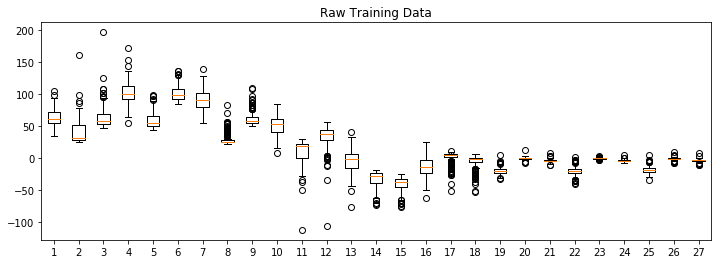

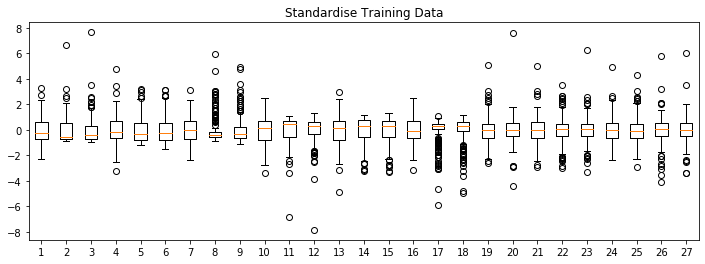

In [6]:
# Box plot of the Training Data
fig = plt.figure(figsize=[12, 4])
ax = fig.add_subplot(1, 1, 1)
ax.boxplot(X_train.values)
ax.set_title('Raw Training Data')

# StandardScaler used to standardise. Scale and Rescale
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

fig = plt.figure(figsize=[12, 4])
ax = fig.add_subplot(1, 1, 1)
ax.boxplot(X_train);
ax.set_title('Standardise Training Data');

## Functions

In [7]:
# function to do our eval for us, this is quite simple and will
# - create a figure
# - draw a confusion matrix for the trainign data in a sub-fig on the left
# - draw a confusion matrix for the testing data in a sub-fig on the right
# - compute the overall classification accuracy on the testing data
# this has simply been created as we're going to do this for each test that we run
def eval_model(model, X_train, Y_train, X_val, Y_val, X_test, Y_test):
    fig = plt.figure(figsize=[12, 3])
    ax = fig.add_subplot(1, 3, 1)
    conf = plot_confusion_matrix(model, X_train, Y_train, normalize='true', xticks_rotation='vertical', ax=ax)
    pred = model.predict(X_train)
    conf.ax_.set_title('Train Performance: %06.5f' %(sum(pred == Y_train)/len(Y_train)));
    
    ax = fig.add_subplot(1, 3, 2)
    conf = plot_confusion_matrix(model, X_val, Y_val, normalize='true', xticks_rotation='vertical', ax=ax)
    pred = model.predict(X_val)
    conf.ax_.set_title('Val Performance: %06.5f' %(sum(pred == Y_val)/len(Y_val)))
    
    ax = fig.add_subplot(1, 3, 3)
    conf = plot_confusion_matrix(model, X_test, Y_test, normalize='true', xticks_rotation='vertical', ax=ax)
    pred = model.predict(X_test)
    conf.ax_.set_title('Test Performance: %06.5f' %(sum(pred == Y_test)/len(Y_test)));

## Multi-Class K-Nearest Neighbours

Classification Report on Testing Set 

              precision    recall  f1-score   support

          d        0.80      0.85      0.82        55
          h        0.56      0.79      0.65        19
          o        0.87      0.59      0.70        22
          s        0.84      0.78      0.81        67

    accuracy                           0.78       163
   macro avg       0.76      0.75      0.75       163
weighted avg       0.80      0.78      0.78       163



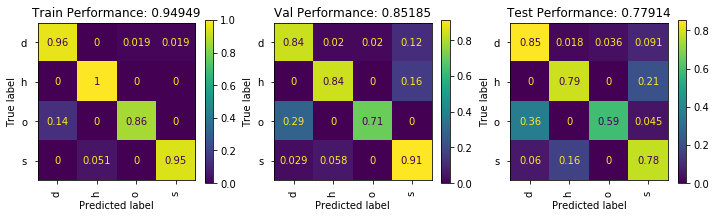

In [8]:
# Basic Parameters
cknn = KNeighborsClassifier(n_neighbors=10, weights='uniform')
cknn.fit(X_train, y_train)
eval_model(cknn, X_train, y_train, X_val, y_val, X_test, y_test)
print('Classification Report on Testing Set \n')
print(classification_report(y_test, cknn.predict(X_test)))

Classification Report on Testing Set 

              precision    recall  f1-score   support

          d        0.82      0.82      0.82        55
          h        0.56      0.79      0.65        19
          o        0.87      0.59      0.70        22
          s        0.82      0.81      0.81        67

    accuracy                           0.78       163
   macro avg       0.76      0.75      0.75       163
weighted avg       0.79      0.78      0.78       163



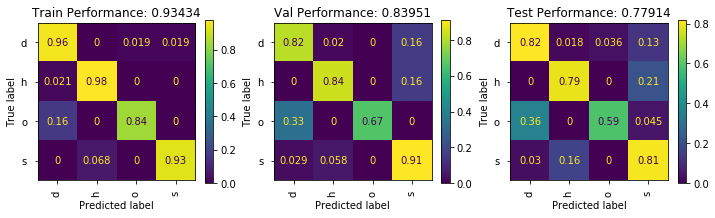

In [9]:
# Increasing the number of neighbours
cknn = KNeighborsClassifier(n_neighbors=20, weights='uniform')
cknn.fit(X_train, y_train)
eval_model(cknn, X_train, y_train, X_val, y_val, X_test, y_test)
print('Classification Report on Testing Set \n')
print(classification_report(y_test, cknn.predict(X_test)))

Classification Report on Testing Set 

              precision    recall  f1-score   support

          d        0.79      0.84      0.81        55
          h        0.62      0.79      0.70        19
          o        0.83      0.68      0.75        22
          s        0.84      0.79      0.82        67

    accuracy                           0.79       163
   macro avg       0.77      0.77      0.77       163
weighted avg       0.80      0.79      0.79       163



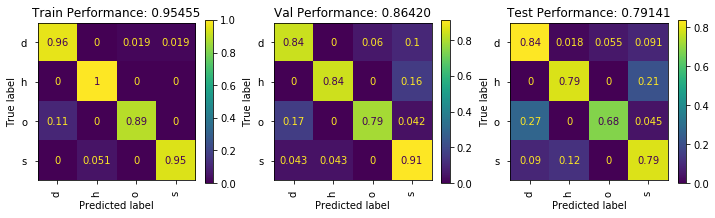

In [10]:
# Increasing the number of neighbours
cknn = KNeighborsClassifier(n_neighbors=5, weights='uniform')
cknn.fit(X_train, y_train)
eval_model(cknn, X_train, y_train, X_val, y_val, X_test, y_test)
print('Classification Report on Testing Set \n')
print(classification_report(y_test, cknn.predict(X_test)))

Classification Report on Testing Set 

              precision    recall  f1-score   support

          d        0.79      0.84      0.81        55
          h        0.62      0.79      0.70        19
          o        0.83      0.68      0.75        22
          s        0.84      0.79      0.82        67

    accuracy                           0.79       163
   macro avg       0.77      0.77      0.77       163
weighted avg       0.80      0.79      0.79       163



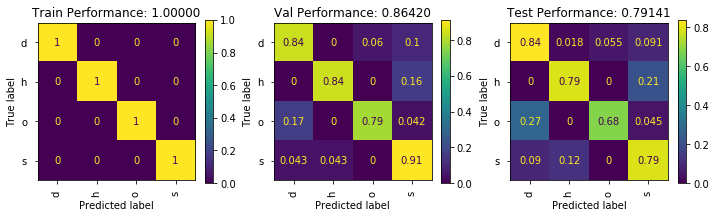

In [11]:
# Using distance based weighting
cknn = KNeighborsClassifier(n_neighbors=5, weights='distance')
cknn.fit(X_train, y_train)
eval_model(cknn, X_train, y_train, X_val, y_val, X_test, y_test)
print('Classification Report on Testing Set \n')
print(classification_report(y_test, cknn.predict(X_test)))

Classification Report on Testing Set 

              precision    recall  f1-score   support

          d        0.82      0.85      0.84        55
          h        0.61      0.74      0.67        19
          o        0.82      0.64      0.72        22
          s        0.83      0.82      0.83        67

    accuracy                           0.80       163
   macro avg       0.77      0.76      0.76       163
weighted avg       0.80      0.80      0.80       163



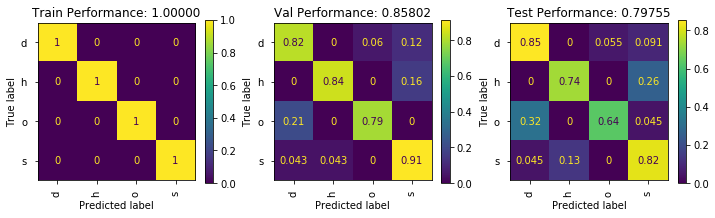

In [12]:
# Using distance based weighting and higher number of neighbours
cknn = KNeighborsClassifier(n_neighbors=5, weights='distance', metric='manhattan')
cknn.fit(X_train, y_train)
eval_model(cknn, X_train, y_train, X_val, y_val, X_test, y_test)
print('Classification Report on Testing Set \n')
print(classification_report(y_test, cknn.predict(X_test)))

Classification Report on Testing Set 

              precision    recall  f1-score   support

          d        0.74      0.89      0.81        55
          h        0.65      0.89      0.76        19
          o        0.92      0.55      0.69        22
          s        0.86      0.75      0.80        67

    accuracy                           0.79       163
   macro avg       0.80      0.77      0.76       163
weighted avg       0.81      0.79      0.78       163



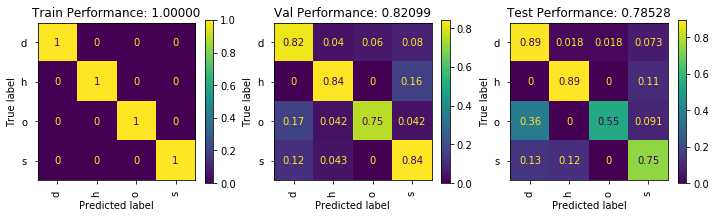

In [13]:
# Using distance based weighting and higher number of neighbours
cknn = KNeighborsClassifier(n_neighbors=5, weights='distance', metric='chebyshev')
cknn.fit(X_train, y_train)
eval_model(cknn, X_train, y_train, X_val, y_val, X_test, y_test)
print('Classification Report on Testing Set \n')
print(classification_report(y_test, cknn.predict(X_test)))

### Grid search on Multi-Class K-Nearest Neighbours

In [14]:
cknn = KNeighborsClassifier()
params = {'n_neighbors' : list(range(1,50,2)), 'weights' : ['uniform', 'distance'], 'metric' : ['euclidean', 'manhattan', 'chebyshev']}
grid_search = GridSearchCV(cknn, params)
grid_search.fit(X_train, y_train); #This optimize for the best result on the Testing set not the Validation

Selected parameters: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}

Classification Report on Testing Set 

              precision    recall  f1-score   support

          d        0.71      0.85      0.78        55
          h        0.65      0.79      0.71        19
          o        0.78      0.64      0.70        22
          s        0.86      0.72      0.78        67

    accuracy                           0.76       163
   macro avg       0.75      0.75      0.74       163
weighted avg       0.77      0.76      0.76       163



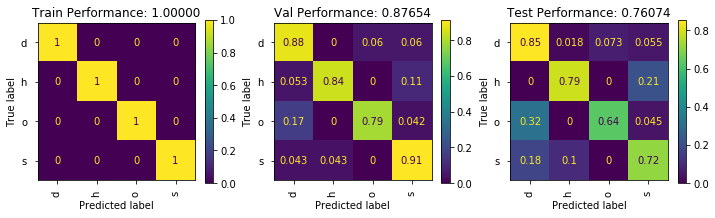

In [15]:
# This choose the best performance on the Training set not the Validation set
best_system = np.argmin(grid_search.cv_results_['rank_test_score'])
params = grid_search.cv_results_['params'][best_system]
print('Selected parameters: {}\n'.format(params))
cknn = KNeighborsClassifier().set_params(**params)
cknn.fit(X_train, y_train)
eval_model(cknn, X_train, y_train, X_val, y_val, X_test, y_test)
print('Classification Report on Testing Set \n')
print(classification_report(y_test, cknn.predict(X_test)))

In [16]:
# To set the Hyperparameter based on the Validation set performance
X_train_val = np.concatenate((X_train,X_val))
y_train_val = pd.Categorical(np.concatenate((y_train,y_val)))

# Create a list where train data indices are -1 and validation data indices are 0
split_index = np.zeros(len(X_train_val))
split_index[0:len(X_train)] = -1

# Use the list to create PredefinedSplit
pds = PredefinedSplit(test_fold = split_index)

cknn = KNeighborsClassifier()
params = {'n_neighbors' : list(range(1,30,2)), 'weights' : ['uniform', 'distance'], 'metric' : ['euclidean', 'manhattan', 'chebyshev']}
grid_search = GridSearchCV(cknn, params, cv=pds)
grid_search.fit(X_train_val, y_train_val);

Selected parameters: {'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}

Classification Report on Testing Set 

              precision    recall  f1-score   support

          d        0.77      0.91      0.83        55
          h        0.67      0.74      0.70        19
          o        0.81      0.59      0.68        22
          s        0.89      0.81      0.84        67

    accuracy                           0.80       163
   macro avg       0.78      0.76      0.77       163
weighted avg       0.81      0.80      0.80       163



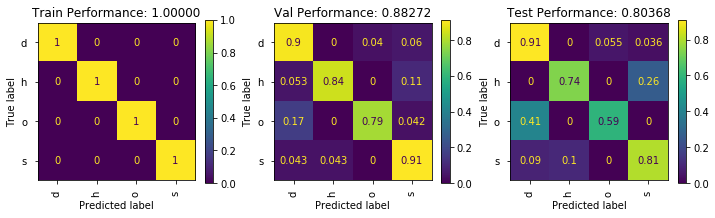

In [17]:
best_system = np.argmin(grid_search.cv_results_['rank_test_score'])
params = grid_search.cv_results_['params'][best_system]
print('Selected parameters: {}\n'.format(params))
cknn = KNeighborsClassifier().set_params(**params)
cknn.fit(X_train, y_train)
eval_model(cknn, X_train, y_train, X_val, y_val, X_test, y_test)
print('Classification Report on Testing Set \n')
print(classification_report(y_test, cknn.predict(X_test)))

## Multi-Class SVMs

Classification Report on Testing Set 

              precision    recall  f1-score   support

          d        0.83      0.80      0.81        55
          h        0.64      0.95      0.77        19
          o        0.67      0.73      0.70        22
          s        0.93      0.81      0.86        67

    accuracy                           0.81       163
   macro avg       0.77      0.82      0.79       163
weighted avg       0.83      0.81      0.81       163



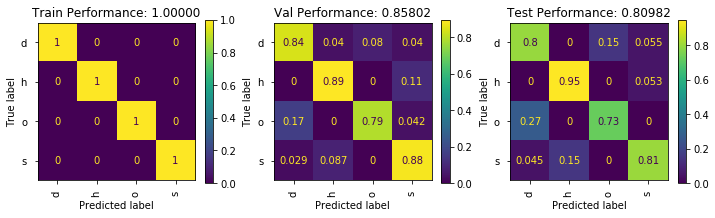

In [18]:
# 1 vs 1
svm = SVC(C = 1, kernel='linear')
svm.fit(X_train, y_train)
eval_model(svm, X_train, y_train, X_val, y_val, X_test, y_test)
print('Classification Report on Testing Set \n')
print(classification_report(y_test, svm.predict(X_test)))

Classification Report on Testing Set 

              precision    recall  f1-score   support

          d        0.83      0.80      0.81        55
          h        0.64      0.95      0.77        19
          o        0.67      0.73      0.70        22
          s        0.93      0.81      0.86        67

    accuracy                           0.81       163
   macro avg       0.77      0.82      0.79       163
weighted avg       0.83      0.81      0.81       163



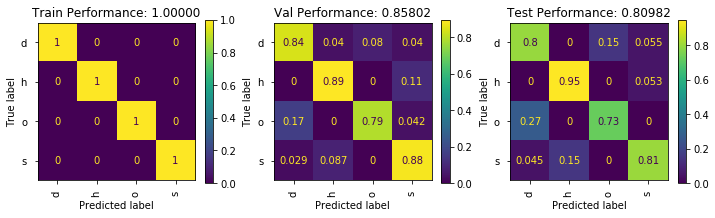

In [19]:
# 1 vs 1
svm = SVC(C = 10, kernel='linear')
svm.fit(X_train, y_train)
eval_model(svm, X_train, y_train, X_val, y_val, X_test, y_test)
print('Classification Report on Testing Set \n')
print(classification_report(y_test, svm.predict(X_test)))

Classification Report on Testing Set 

              precision    recall  f1-score   support

          d        0.84      0.84      0.84        55
          h        0.62      0.95      0.75        19
          o        0.76      0.73      0.74        22
          s        0.93      0.81      0.86        67

    accuracy                           0.82       163
   macro avg       0.79      0.83      0.80       163
weighted avg       0.84      0.82      0.83       163



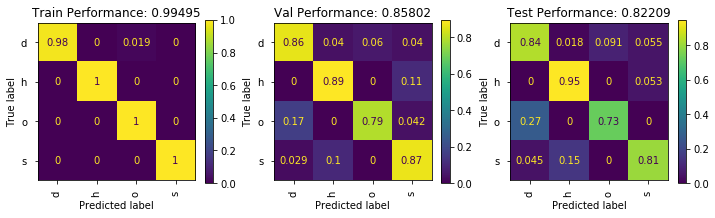

In [20]:
# 1 vs 1
svm = SVC(C = 0.5, kernel='linear')
svm.fit(X_train, y_train)
eval_model(svm, X_train, y_train, X_val, y_val, X_test, y_test)
print('Classification Report on Testing Set \n')
print(classification_report(y_test, svm.predict(X_test)))

Classification Report on Testing Set 

              precision    recall  f1-score   support

          d        0.83      0.80      0.81        55
          h        0.64      0.95      0.77        19
          o        0.67      0.73      0.70        22
          s        0.93      0.81      0.86        67

    accuracy                           0.81       163
   macro avg       0.77      0.82      0.79       163
weighted avg       0.83      0.81      0.81       163



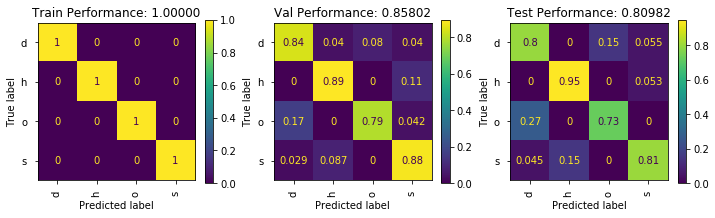

In [21]:
svm = SVC(C = 10, kernel='linear', class_weight='balanced')
svm.fit(X_train, y_train)
eval_model(svm, X_train, y_train, X_val, y_val, X_test, y_test)
print('Classification Report on Testing Set \n')
print(classification_report(y_test, svm.predict(X_test)))

Classification Report on Testing Set 

              precision    recall  f1-score   support

          d        0.85      0.80      0.82        55
          h        0.65      0.89      0.76        19
          o        0.73      0.73      0.73        22
          s        0.89      0.84      0.86        67

    accuracy                           0.82       163
   macro avg       0.78      0.81      0.79       163
weighted avg       0.83      0.82      0.82       163



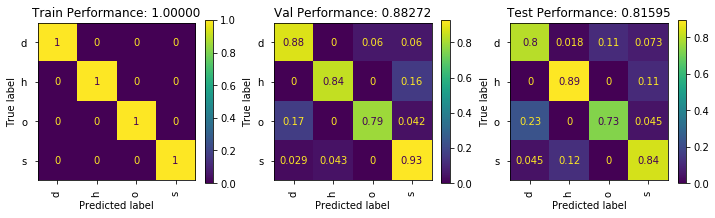

In [22]:
svm = SVC(C = 10, kernel='rbf')
svm.fit(X_train, y_train)
eval_model(svm, X_train, y_train, X_val, y_val, X_test, y_test)
print('Classification Report on Testing Set \n')
print(classification_report(y_test, svm.predict(X_test)))

Classification Report on Testing Set 

              precision    recall  f1-score   support

          d        0.85      0.84      0.84        55
          h        0.62      0.79      0.70        19
          o        0.73      0.73      0.73        22
          s        0.89      0.84      0.86        67

    accuracy                           0.82       163
   macro avg       0.77      0.80      0.78       163
weighted avg       0.82      0.82      0.82       163



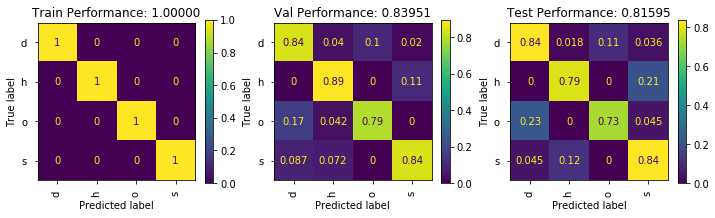

In [23]:
#1 vs all
onevsall_svm = OneVsRestClassifier(SVC(C = 10, kernel='linear',class_weight='balanced'))
onevsall_svm.fit(X_train, y_train)
eval_model(onevsall_svm, X_train, y_train, X_val, y_val, X_test, y_test)
print('Classification Report on Testing Set \n')
print(classification_report(y_test, onevsall_svm.predict(X_test)))

Classification Report on Testing Set 

              precision    recall  f1-score   support

          d        0.88      0.78      0.83        55
          h        0.61      0.74      0.67        19
          o        0.76      0.73      0.74        22
          s        0.83      0.87      0.85        67

    accuracy                           0.80       163
   macro avg       0.77      0.78      0.77       163
weighted avg       0.81      0.80      0.81       163



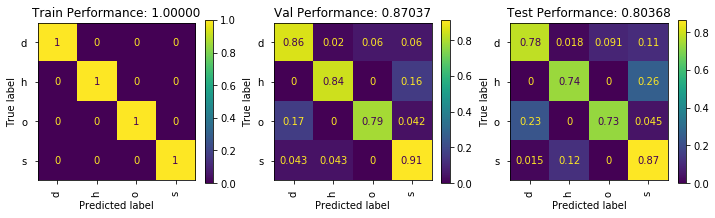

In [24]:
#1 vs all
onevsall_svm = OneVsRestClassifier(SVC(C = 10, kernel='rbf',class_weight='balanced'))
onevsall_svm.fit(X_train, y_train)
eval_model(onevsall_svm, X_train, y_train, X_val, y_val, X_test, y_test)
print('Classification Report on Testing Set \n')
print(classification_report(y_test, onevsall_svm.predict(X_test)))

### Grid search on Multi-Class SVMs

In [25]:
X_train_val = np.concatenate((X_train,X_val))
y_train_val = pd.Categorical(np.concatenate((y_train,y_val)))

# Create a list where train data indices are -1 and validation data indices are 0
split_index = np.zeros(len(X_train_val))
split_index[0:len(X_train)] = -1

# Use the list to create PredefinedSplit
pds = PredefinedSplit(test_fold = split_index)

#1 vs all
onevsall_svm = OneVsRestClassifier(SVC())
C_range = (np.linspace(0.5,5,50)**2).tolist()
param_grid = [
  {'estimator__C': C_range, 'estimator__kernel': ['linear']},
  {'estimator__C': C_range, 'estimator__gamma': np.linspace(1,0.001,50), 'estimator__kernel': ['rbf']},
  {'estimator__C': C_range, 'estimator__degree': [2, 3, 4, 5, 6], 'estimator__kernel': ['poly']},
 ]
grid_search = GridSearchCV(onevsall_svm, param_grid,cv=pds)
grid_search.fit(X_train_val, y_train_val);

Selected parameters: {'C': 0.46740941274468967, 'gamma': 0.18448979591836734, 'kernel': 'rbf'}

Classification Report on Testing Set 

              precision    recall  f1-score   support

          d        0.94      0.82      0.87        55
          h        0.63      0.89      0.74        19
          o        0.80      0.73      0.76        22
          s        0.85      0.87      0.86        67

    accuracy                           0.83       163
   macro avg       0.81      0.83      0.81       163
weighted avg       0.85      0.83      0.84       163



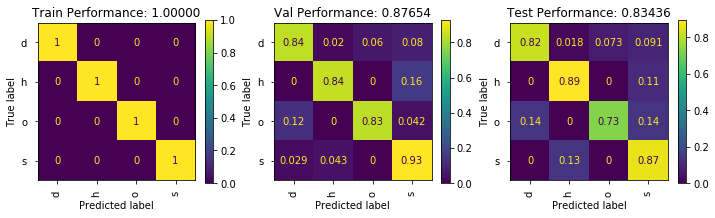

In [26]:
best_system = np.argmin(grid_search.cv_results_['rank_test_score'])
params = grid_search.cv_results_['params'][best_system]
params['C'] = params.pop('estimator__C')
params['gamma'] = params.pop('estimator__gamma')
params['kernel'] = params.pop('estimator__kernel')
print('Selected parameters: {}\n'.format(params))
onevsall_svm = OneVsRestClassifier(SVC().set_params(**params))
onevsall_svm.fit(X_train, y_train)
eval_model(onevsall_svm, X_train, y_train, X_val, y_val, X_test, y_test)
print('Classification Report on Testing Set \n')
print(classification_report(y_test, onevsall_svm.predict(X_test)))

In [27]:
X_train_val = np.concatenate((X_train,X_val))
y_train_val = pd.Categorical(np.concatenate((y_train,y_val)))

# Create a list where train data indices are -1 and validation data indices are 0
split_index = np.zeros(len(X_train_val))
split_index[0:len(X_train)] = -1

# Use the list to create PredefinedSplit
pds = PredefinedSplit(test_fold = split_index)

svm = SVC()
C_range = (np.linspace(0.5,5,50)**2).tolist()
param_grid = [
  {'C': C_range, 'kernel': ['linear']},
  {'C': C_range, 'gamma': np.linspace(1,0.001,50), 'kernel': ['rbf']},
  {'C': C_range, 'degree': [2, 3, 4, 5, 6], 'kernel': ['poly']},
 ]
grid_search = GridSearchCV(svm, param_grid,cv=pds)
grid_search.fit(X_train_val, y_train_val);

Selected parameters: {'C': 1.524468971261974, 'gamma': 0.06216326530612237, 'kernel': 'rbf'}

Classification Report on Testing Set 

              precision    recall  f1-score   support

          d        0.88      0.82      0.85        55
          h        0.58      0.74      0.65        19
          o        0.77      0.77      0.77        22
          s        0.85      0.84      0.84        67

    accuracy                           0.81       163
   macro avg       0.77      0.79      0.78       163
weighted avg       0.82      0.81      0.81       163



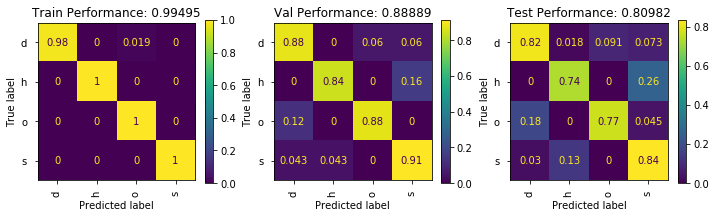

In [28]:
best_system = np.argmin(grid_search.cv_results_['rank_test_score'])
params = grid_search.cv_results_['params'][best_system]
print('Selected parameters: {}\n'.format(params))
svm = SVC().set_params(**params)
svm.fit(X_train, y_train)
eval_model(svm, X_train, y_train, X_val, y_val, X_test, y_test)
print('Classification Report on Testing Set \n')
print(classification_report(y_test, svm.predict(X_test)))

## Random Forest Classifier

Classification Report on Testing Set 

              precision    recall  f1-score   support

          d        0.84      0.69      0.76        55
          h        0.72      0.68      0.70        19
          o        0.64      0.73      0.68        22
          s        0.80      0.90      0.85        67

    accuracy                           0.78       163
   macro avg       0.75      0.75      0.75       163
weighted avg       0.78      0.78      0.78       163



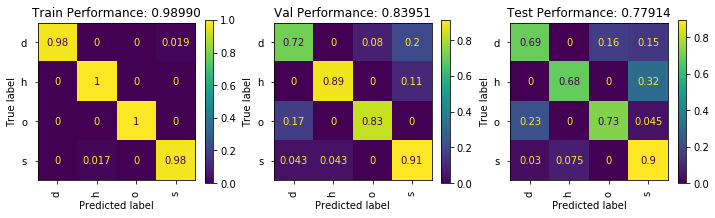

In [29]:
rf = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=0)
rf.fit(X_train, y_train)
eval_model(rf, X_train, y_train, X_val, y_val, X_test, y_test)
print('Classification Report on Testing Set \n')
print(classification_report(y_test, rf.predict(X_test)))

Classification Report on Testing Set 

              precision    recall  f1-score   support

          d        0.84      0.69      0.76        55
          h        0.72      0.68      0.70        19
          o        0.62      0.68      0.65        22
          s        0.79      0.90      0.84        67

    accuracy                           0.77       163
   macro avg       0.75      0.74      0.74       163
weighted avg       0.78      0.77      0.77       163



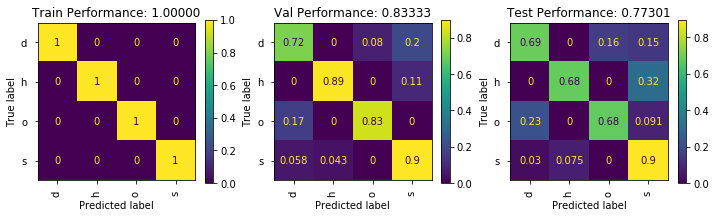

In [30]:
rf = RandomForestClassifier(n_estimators=100, max_depth=12, random_state=0)
rf.fit(X_train, y_train)
eval_model(rf, X_train, y_train, X_val, y_val, X_test, y_test)
print('Classification Report on Testing Set \n')
print(classification_report(y_test, rf.predict(X_test)))

Classification Report on Testing Set 

              precision    recall  f1-score   support

          d        0.85      0.73      0.78        55
          h        0.75      0.63      0.69        19
          o        0.68      0.68      0.68        22
          s        0.78      0.91      0.84        67

    accuracy                           0.79       163
   macro avg       0.77      0.74      0.75       163
weighted avg       0.79      0.79      0.78       163



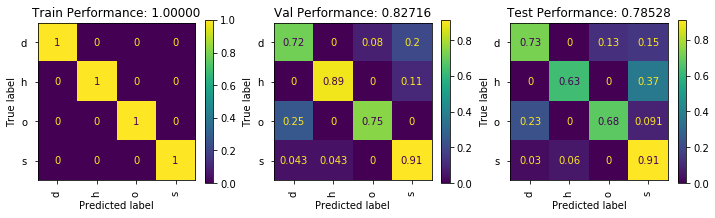

In [31]:
rf = RandomForestClassifier(n_estimators=200, max_depth=12, random_state=0)
rf.fit(X_train, y_train)
eval_model(rf, X_train, y_train, X_val, y_val, X_test, y_test)
print('Classification Report on Testing Set \n')
print(classification_report(y_test, rf.predict(X_test)))

Classification Report on Testing Set 

              precision    recall  f1-score   support

          d        0.83      0.73      0.78        55
          h        0.80      0.63      0.71        19
          o        0.71      0.68      0.70        22
          s        0.77      0.91      0.84        67

    accuracy                           0.79       163
   macro avg       0.78      0.74      0.75       163
weighted avg       0.79      0.79      0.78       163



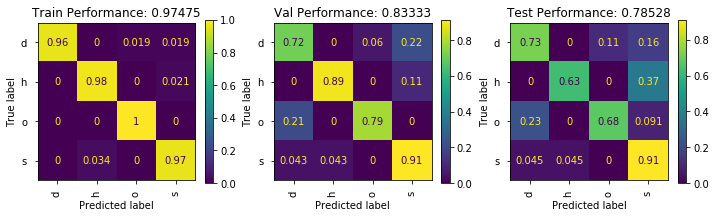

In [32]:
rf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
rf.fit(X_train, y_train)
eval_model(rf, X_train, y_train, X_val, y_val, X_test, y_test)
print('Classification Report on Testing Set \n')
print(classification_report(y_test, rf.predict(X_test)))

Classification Report on Testing Set 

              precision    recall  f1-score   support

          d        0.83      0.71      0.76        55
          h        0.71      0.63      0.67        19
          o        0.67      0.73      0.70        22
          s        0.79      0.88      0.83        67

    accuracy                           0.77       163
   macro avg       0.75      0.74      0.74       163
weighted avg       0.78      0.77      0.77       163



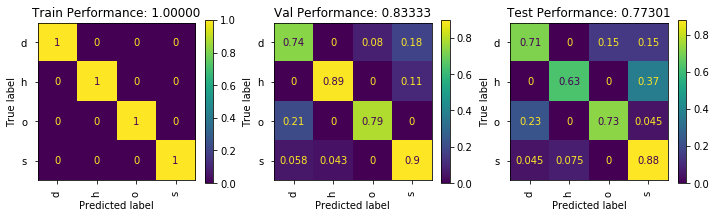

In [33]:
rf = RandomForestClassifier(n_estimators=100, max_depth=12, random_state=0, class_weight='balanced_subsample')
rf.fit(X_train, y_train)
eval_model(rf, X_train, y_train, X_val, y_val, X_test, y_test)
print('Classification Report on Testing Set \n')
print(classification_report(y_test, rf.predict(X_test)))

Classification Report on Testing Set 

              precision    recall  f1-score   support

          d        0.83      0.71      0.76        55
          h        0.72      0.68      0.70        19
          o        0.70      0.73      0.71        22
          s        0.79      0.88      0.83        67

    accuracy                           0.78       163
   macro avg       0.76      0.75      0.75       163
weighted avg       0.78      0.78      0.78       163



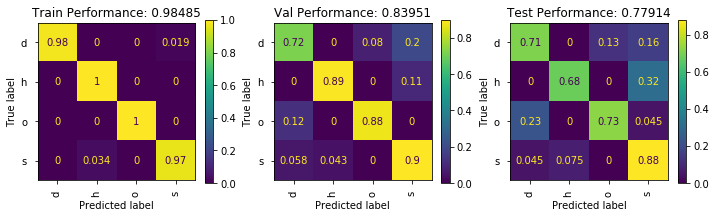

In [34]:
rf = RandomForestClassifier(n_estimators=50, max_depth=4, random_state=0,class_weight='balanced_subsample')
rf.fit(X_train, y_train)
eval_model(rf, X_train, y_train, X_val, y_val, X_test, y_test)
print('Classification Report on Testing Set \n')
print(classification_report(y_test, rf.predict(X_test)))

### Grid search on Random Forest Classifier

In [35]:
X_train_val = np.concatenate((X_train,X_val))
y_train_val = pd.Categorical(np.concatenate((y_train,y_val)))

# Create a list where train data indices are -1 and validation data indices are 0
split_index = np.zeros(len(X_train_val))
split_index[0:len(X_train)] = -1

# Use the list to create PredefinedSplit
pds = PredefinedSplit(test_fold = split_index)

rf = RandomForestClassifier(random_state=0)
params = {'n_estimators' : list(range(10,200,20)), 'max_depth' : list(range(2,40,2))}
grid_search = GridSearchCV(rf, params,cv=pds)
grid_search.fit(X_train_val, y_train_val);

Selected parameters: {'max_depth': 6, 'n_estimators': 50}

Classification Report on Testing Set 

              precision    recall  f1-score   support

          d        0.86      0.76      0.81        55
          h        0.68      0.68      0.68        19
          o        0.73      0.73      0.73        22
          s        0.81      0.88      0.84        67

    accuracy                           0.80       163
   macro avg       0.77      0.76      0.77       163
weighted avg       0.80      0.80      0.80       163



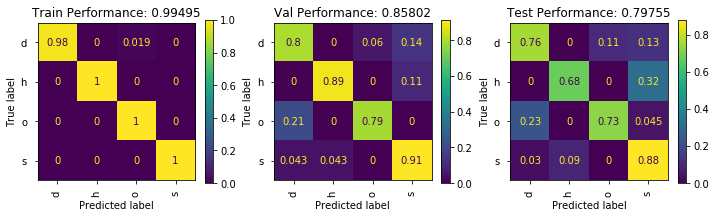

In [36]:
best_system = np.argmin(grid_search.cv_results_['rank_test_score'])
params = grid_search.cv_results_['params'][best_system]
print('Selected parameters: {}\n'.format(params))
rf = RandomForestClassifier().set_params(**params)
rf.fit(X_train, y_train)
eval_model(rf, X_train, y_train, X_val, y_val, X_test, y_test)
print('Classification Report on Testing Set \n')
print(classification_report(y_test, rf.predict(X_test)))

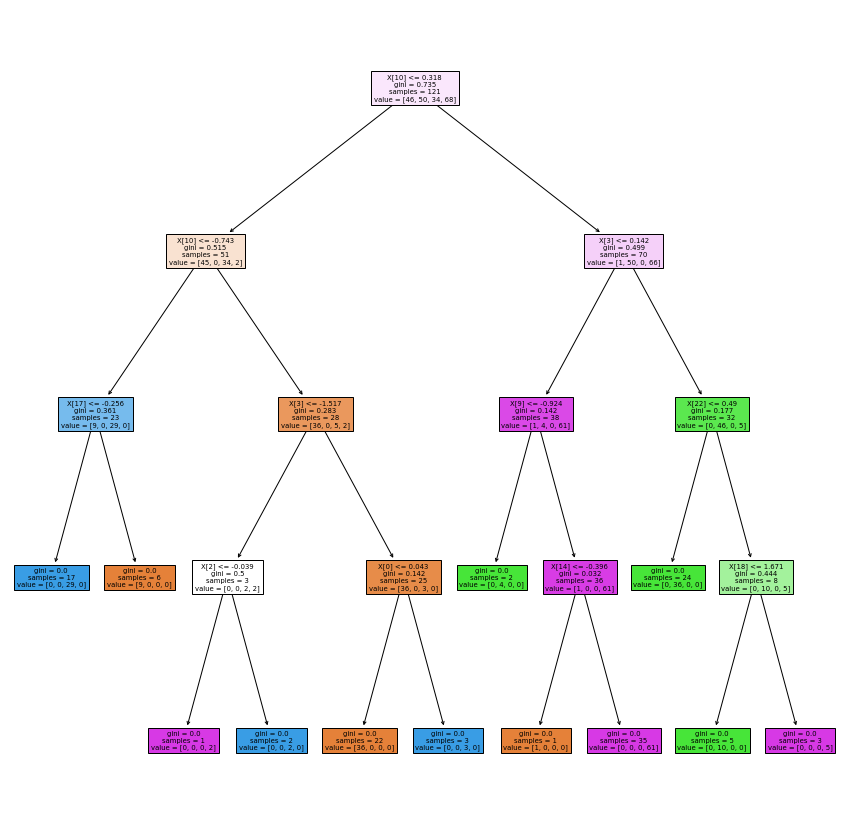

In [37]:
fig = plt.figure(figsize=(15,15))
_ = tree.plot_tree(rf.estimators_[0], filled=True) 

## Final Results

In [38]:
print(colored('\nBest K-Nearest Neighbours Classifier\n', 'red'))
print('Selected parameters:')
for key in cknn.get_params():
    print(key, ' : ', cknn.get_params()[key])
print('\nClassification Report on Testing Set \n')
print(classification_report(y_test, cknn.predict(X_test)))

print(colored('\nBest SVM Classifier\n', 'red'))
print('Selected parameters:')
for key in svm.get_params():
    print(key, ' : ', svm.get_params()[key])
print('\nClassification Report on Testing Set \n')
print(classification_report(y_test, svm.predict(X_test)))

print(colored('\nBest Random Forest Classifier\n', 'red'))
print('Selected parameters:')
for key in rf.get_params():
    print(key, ' : ', rf.get_params()[key])
print('\nClassification Report on Testing Set \n')
print(classification_report(y_test, rf.predict(X_test)))


Best K-Nearest Neighbours Classifier

Selected parameters:
algorithm  :  auto
leaf_size  :  30
metric  :  manhattan
metric_params  :  None
n_jobs  :  None
n_neighbors  :  1
p  :  2
weights  :  uniform

Classification Report on Testing Set 

              precision    recall  f1-score   support

          d        0.77      0.91      0.83        55
          h        0.67      0.74      0.70        19
          o        0.81      0.59      0.68        22
          s        0.89      0.81      0.84        67

    accuracy                           0.80       163
   macro avg       0.78      0.76      0.77       163
weighted avg       0.81      0.80      0.80       163


Best SVM Classifier

Selected parameters:
C  :  1.524468971261974
break_ties  :  False
cache_size  :  200
class_weight  :  None
coef0  :  0.0
decision_function_shape  :  ovr
degree  :  3
gamma  :  0.06216326530612237
kernel  :  rbf
max_iter  :  -1
probability  :  False
random_state  :  None
shrinking  :  True
tol  :  0.0

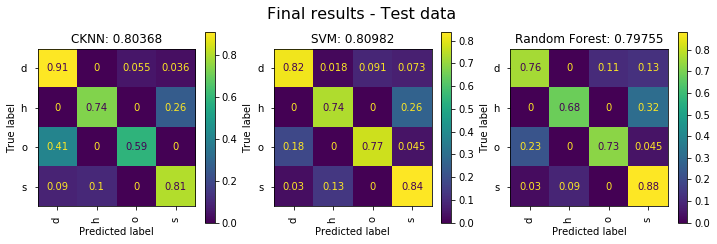

In [39]:
fig = plt.figure(figsize=[12, 3.5])
ax = fig.add_subplot(1, 3, 1)
conf = plot_confusion_matrix(cknn, X_test, y_test, normalize='true', xticks_rotation='vertical', ax=ax)
pred = cknn.predict(X_test)
conf.ax_.set_title('CKNN: %06.5f' %(sum(pred == y_test)/len(y_test)));

ax = fig.add_subplot(1, 3, 2)
conf = plot_confusion_matrix(svm, X_test, y_test, normalize='true', xticks_rotation='vertical', ax=ax)
pred = svm.predict(X_test)
conf.ax_.set_title('SVM: %06.5f' %(sum(pred == y_test)/len(y_test)));

ax = fig.add_subplot(1, 3, 3)
conf = plot_confusion_matrix(rf, X_test, y_test, normalize='true', xticks_rotation='vertical', ax=ax)
pred = rf.predict(X_test)
conf.ax_.set_title('Random Forest: %06.5f' %(sum(pred == y_test)/len(y_test)))

fig.suptitle('Final results - Test data', fontsize=16);